<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<font size=3>
Dr. Rohban
</font>
<br>
<br>
<font size=6>
Homework 2
</font><br>
<font size=4>


In the following notebook, we aims to develop a Convolutional Neural Network (CNN) using the PyTorch framework that can accurately detect and classify Brain Tumors from MRI scans. The CNN will be trained on a large dataset of labeled brain tumor images to learn the patterns and features associated with different tumor types.

## <b>1 <span style='color:#e61227'>|</span> reuirements and libraries</b>

Feel free to add any other library you need.


In [1]:
!pip install split-folders
!pip install torch-summary

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set(style='darkgrid')
import copy
import os
import torch
from PIL import Image
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
import splitfolders
from torchsummary import summary
import torch.nn.functional as F
import pathlib
from sklearn.metrics import classification_report
import itertools
from tqdm.notebook import trange, tqdm
from torch import optim
import warnings

warnings.filterwarnings('ignore')

NameError: name '_C' is not defined

## <b>2 <span style='color:#e61227'>|</span> Dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.1 |</span></b> Download and load Dataset</b></p>
</div>

In [3]:
! gdown 1hwV1mcc-Bm_AY_t_FG8byxKFmhY4uGsh
! unzip brain.zip

Downloading...
From (original): https://drive.google.com/uc?id=1hwV1mcc-Bm_AY_t_FG8byxKFmhY4uGsh
From (redirected): https://drive.google.com/uc?id=1hwV1mcc-Bm_AY_t_FG8byxKFmhY4uGsh&confirm=t&uuid=1ccf6db7-abca-4d90-840a-3f69a8446a96
To: /home/armin/D/Code/Python/NoteBooks/Notebooks/IABI /Rohban HW P/2/brain.zip
  1%|▌                                       | 1.57M/111M [00:11<13:37, 134kB/s]^C
Traceback (most recent call last):
  File "/home/armin/anaconda3/bin/gdown", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/home/armin/anaconda3/lib/python3.11/site-packages/gdown/__main__.py", line 172, in main
    download(
  File "/home/armin/anaconda3/lib/python3.11/site-packages/gdown/download.py", line 368, in download
    for chunk in res.iter_content(chunk_size=CHUNK_SIZE):
  File "/home/armin/anaconda3/lib/python3.11/site-packages/requests/models.py", line 820, in generate
    yield from self.raw.stream(chunk_size, decode_content=True)
  File "/home/armin/anaconda3/

## <b>3 <span style='color:#e61227'>|</span> Data Preparation </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Splitting Dataset</b></p>
</div>

- We need to evaluate the model on validation datasets to track the model's performance during training. Then, We use 20% of the dataset for the **Validation set** and use the rest as the **Training set**, so we have an **80/20** split!

In [5]:
# Dataset Path
data_dir = 'brain'
data_dir = pathlib.Path(data_dir)

NameError: name 'pathlib' is not defined

In [6]:
# define transformation
# transform images to (256, 256) and normalize them
transform = transforms.Compose(
    [
        ########################################
        transforms.Resize(size=(256, 256), interpolation=transforms.InterpolationMode.BILINEAR, max_size=None,
                          antialias=True),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomVerticalFlip(0.5),
        transforms.RandomRotation(degrees=[-30.0, 30.0], interpolation=transforms.InterpolationMode.NEAREST,
                                  expand=False, fill=0),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
        ########################################
    ]
)

NameError: name 'transforms' is not defined

## <b>4 <span style='color:#e61227'>|</span> Image Augmentation Definitions</b>

In [2]:
# Define an object of the custom dataset for the train and validation.
train_set = torchvision.datasets.ImageFolder(data_dir.joinpath("train"), transform=transform)
train_set.transform
val_set = torchvision.datasets.ImageFolder(data_dir.joinpath("val"), transform=transform)
val_set.transform

NameError: name 'torchvision' is not defined

In [1]:
# Visualiztion some images from Train Set, half healthy and half tumor images


# healthy_idx = train_set.class_to_idx['Healthy']  
# brain_idx = train_set.class_to_idx['Brain Tumor']
#healthy_idx = 1
# tumor = 0 


n_samples = 5
healthy_images, tumor_images = [], []
########################################

for image, label in train_set:
    if label and len(healthy_images) <= n_samples:
        healthy_images.append(image)
    elif not label and len(tumor_images) <= n_samples:
        tumor_images.append(image)

    if len(healthy_images) == n_samples and len(tumor_images) == n_samples:
        break

print(type(image))

########################################

NameError: name 'train_set' is not defined

## <b>5 <span style='color:#e61227'>|</span> Creating Dataloaders</b>

In [9]:
# import and load train, validation
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)


In [10]:
# print shape for Training data and Validation data
for key, value in {'Training data': train_loader, "Validation data": val_loader}.items():
    for X, y in value:
        print(f"{key}:")
        print(f"Shape of X : {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}\n")
        break

Training data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64

Validation data:
Shape of X : torch.Size([64, 3, 256, 256])
Shape of y: torch.Size([64]) torch.int64


## <b>6 <span style='color:#e61227'>|</span> Define Brain Tumor Classifier</b>


In [11]:
'''This function can be useful in determining the output size of a convolutional layer in a neural network,
given the input dimensions and the convolutional layer's parameters. You may not use it in your code'''


def findConv2dOutShape(hin, win, conv, pool=2):
    # get conv arguments
    kernel_size = conv.kernel_size
    stride = conv.stride
    padding = conv.padding
    dilation = conv.dilation

    hout = np.floor((hin + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) / stride[0] + 1)
    wout = np.floor((win + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) / stride[1] + 1)

    if pool:
        hout /= pool
        wout /= pool
    return int(hout), int(wout)

In [24]:
# Define any arbitrary Architecture For CNN_TUMOR Model


class CNN_TUMOR(nn.Module):

    # Network Initialisation
    def __init__(self, params):
        super(CNN_TUMOR, self).__init__()

        Cin, Hin, Win = params["shape_in"]
        init_f = params["initial_filters"]
        num_fc1 = params["num_fc1"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]

        ########################################
        ### TODO ###
        # define layers of the model here
        ########################################

    def forward(self, X):

########################################
### TODO ###
########################################

In [13]:
# define parameters of the model
params_model = {
    "shape_in":,
"initial_filters": ,
"num_fc1":,
"dropout_rate":,
"num_classes":}

# Create instantiation of Network class
cnn_model = CNN_TUMOR(params_model)

# define computation hardware approach (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = cnn_model.to(device)

## <b>7 <span style='color:#e61227'>|</span> Loss Function Definition</b>

In [15]:
# define the loss function

loss_func =

## <b>8 <span style='color:#e61227'>|</span> Optimiser Definition</b>

In [16]:
# define the optimizer

opt =
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=20, verbose=1)

## <b>9 <span style='color:#e61227'>|</span> Training Model</b>

In [17]:
# Function to compute the loss value per batch of data
def loss_batch(loss_func, output, target):
    ########################################
    ### TODO ###
    ########################################

    return loss.item(), metric_b


# Compute the loss value & performance metric for the entire dataset (epoch)
def loss_epoch(model, loss_func, dataset_dl, opt):
    run_loss = 0.0
    accuracy = 0.0
    len_data = len(dataset_dl.dataset)

    # internal loop over dataset

    ########################################
    ### TODO ###
    ########################################

    return loss, accuracy

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>9.2 |</span></b> Training Function</b></p>
</div>


In [19]:
def Train_Val(model, train_dl, val_dl, epochs, opt, lr_scheduler, loss_func):
    loss_history = {"train": [], "val": []}
    metric_history = {"train": [], "val": []}
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')

    for epoch in tqdm(range(epochs)):
        ########################################
        ### TODO ###
        # train the model for n epoch. report loss value and accuracy of the model for train and val datasets
        # in each epoch, save the weights of the best model
        ########################################

        print(f"train loss: {train_loss:.6f}, val loss: {val_loss:.6f}, accuracy: {100 * val_metric:.2f}")
        print("-" * 10)

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, loss_history, metric_history

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>9.3 |</span></b> Training Process </b></p>
</div>

In [20]:
# Define parameters used for training and evaluation of a cnn_model
epochs = 20

# train and validate the model
cnn_model, loss_hist, metric_hist = Train_Val(cnn_model, train_loader, val_loader, epochs, opt, lr_scheduler, loss_func)

  0%|          | 0/20 [00:00<?, ?it/s]

train loss: 0.614838, dev loss: 0.551406, accuracy: 73.29
----------
train loss: 0.490753, dev loss: 0.448298, accuracy: 79.70
----------
train loss: 0.433915, dev loss: 0.413980, accuracy: 80.78
----------
train loss: 0.417365, dev loss: 0.378949, accuracy: 83.06
----------
train loss: 0.372599, dev loss: 0.379976, accuracy: 81.43
----------
train loss: 0.356646, dev loss: 0.331331, accuracy: 85.67
----------
train loss: 0.322673, dev loss: 0.331347, accuracy: 85.02
----------
train loss: 0.321540, dev loss: 0.398233, accuracy: 82.19
----------
train loss: 0.309392, dev loss: 0.296375, accuracy: 87.40
----------
train loss: 0.285293, dev loss: 0.293640, accuracy: 86.54
----------
train loss: 0.277502, dev loss: 0.263657, accuracy: 88.71
----------
train loss: 0.256817, dev loss: 0.267498, accuracy: 87.84
----------
train loss: 0.276905, dev loss: 0.266900, accuracy: 88.60
----------
train loss: 0.235023, dev loss: 0.233416, accuracy: 90.77
----------
train loss: 0.242705, dev loss: 0.

## <b>10 <span style='color:#e61227'>|</span> Evaluation Metric Visualization </b>

<Axes: >

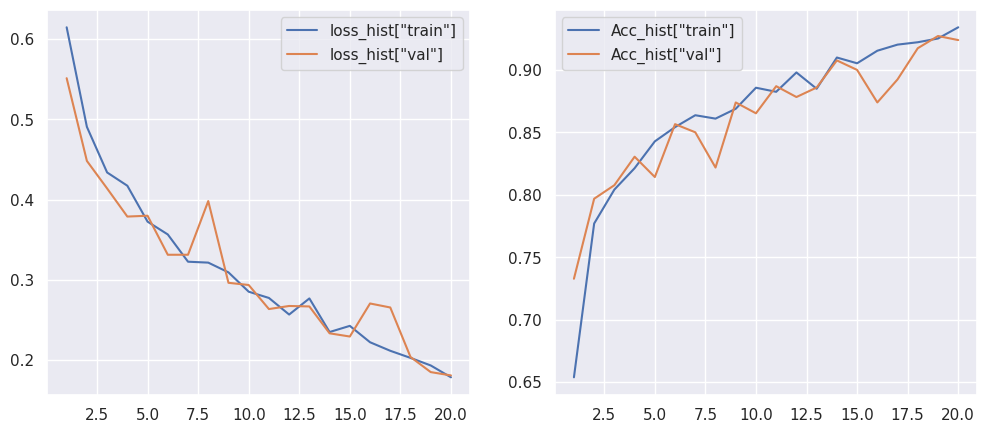

In [22]:
# Convergence History Plot
# plot the loss vlues and accuracy of your model during the training process


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>10.2 |</span></b> Confusion_Matrix </b></p>
</div>

In [ ]:
# define function For Classification Report
def Ture_and_Pred(val_loader, model):
    i = 0
    y_true = []
    y_pred = []

    ########################################
    ### TODO ###
    # calculate prediction and the ground truth for the val dataset.
    ########################################

    return y_true, y_pred


def confusion_matrix(y_true, y_pred)

    ########################################
    ### TODO ###
    # calculate confusion matrix
    ########################################

    return cm


# check confusion matrix for error analysis
y_true, y_pred = Ture_and_Pred(val_loader, cnn_model)

print(classification_report(y_true, y_pred), '\n\n')
cm = confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       503
         1.0       0.86      0.89      0.87       418

    accuracy                           0.88       921
   macro avg       0.88      0.88      0.88       921
weighted avg       0.88      0.88      0.88       921
 


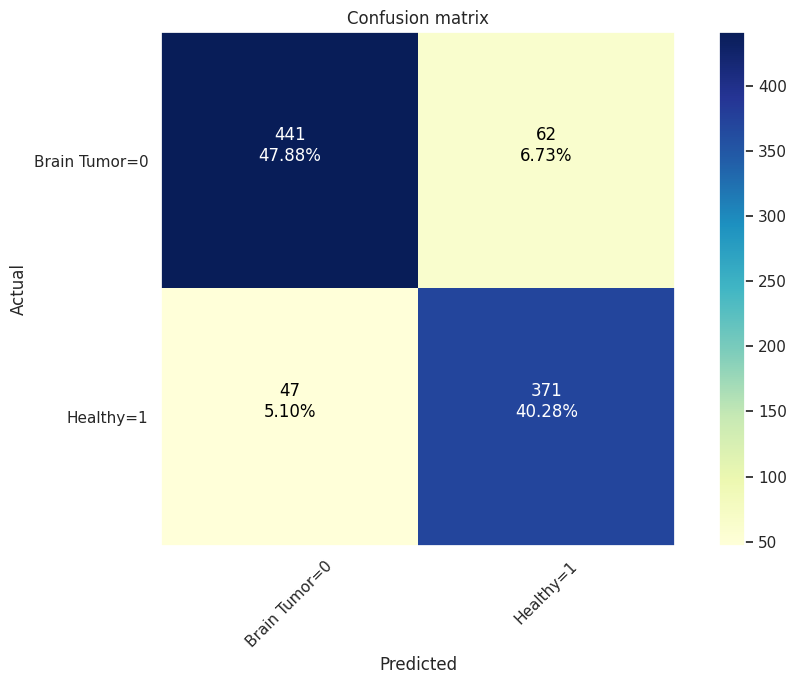

In [ ]:
# Confusion Matrix Plotting Function
def show_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.YlGnBu):


########################################
### TODO ###
# visualize the confusion matrix
########################################

show_confusion_matrix(cm)